<div class='alert-block alert-info'>
    <br>
    <h1 align="center"><b>  Optimisation problem without constraints :</b> </h1>
    <h3 align="center">Find the optimal position of a radio antenna in a city</h3>
    <h5 align="center">Melchior Thierry, Victor Pierron, Oscar Pastural, Richard Goudelin</a></h5>
    <br>
</div>


<img src="building.png" alt="Texte alternatif" width="400" height="200" />


<div style="background-color: #e8f4f8; border: 2px solid #b6d4e0; padding: 20px; border-radius: 10px; margin: 20px; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
    <h3 style="color: #2c7be5; font-size: 22px; font-family: 'Verdana', sans-serif; margin-bottom: 15px;">Problem definition</h3>
    <p style="line-height: 1.6; color: #333; font-family: 'Arial', sans-serif;">

Let's consider an optimization problem aiming to determine the optimal position of an antenna within a space where buildings and anti-buildings are randomly distributed. Each building is characterized by a unique position and an associated population, while anti-buildings cannot be located at the same positions as the building

- **Buildings:** These are structures with known positions and associated populations. The objective is to optimize signal coverage with respect to these buildings.
  
- **Anti-Buildings:** These structures, similar to buildings, have specific positions. However, the presence of an anti-building at a location interferes with signal strength. The objective function accounts for the distances between the antenna and these anti-buildings, aiming to attenuate the signal around them.
s.

### Objective Function:

Let $f(a, b)$ be the objective function to optimize, where $a$ and $b$ represent the coordinates of the antenna position. The function $f$ is defined as follows:

$$
f(a, b) = \frac{1}{P} \sum_{i=1}^{n} k_i \cdot \text{distance}(x_i, y_i, a, b) + \sum_{j=1}^{m} \frac{C}{(\text{distance}(x_j, y_j, a, b) + \epsilon)^{1/3}}
$$

- $n$ is the number of buildings,
- $m$ is the number of anti-buildings,
- $k_i$ is the population of building $i$,
- $\text{distance}(x_i, y_i, a, b)$ is the Euclidean distance between the antenna and building $i$,
- $\epsilon$ is a small constant to avoid division by zero,
- $P$ is the total sum of populations of all buildings,
- $C$ is a signal attenuation constant.

### Problem Objective:

The objective is to find the coordinates $(a, b)$ of the antenna that minimize the function $f(a, b)$. The function $f$ evaluates the quality of signal coverage by considering the distance between the antenna and buildings while attenuating the signal in the presence of anti-buildings.

### Constraints:

This optimization problem is unconstrained, meaning the antenna can be freely positioned within the space defined by the positions of buildings and anti-buildings.

### Optimization Method:

A common approach to solving this unconstrained optimization problem is to use numerical optimization methods such as the BFGS method. These iterative methods can efficiently find the optimal coordinates of the antenna by adjusting its position to minimize the objective function.

In summary, the problem involves determining the optimal position of the antenna within the space to optimize signal coverage while considering the positions of buildings and anti-buildings.


<a id="1"></a>
    
<div class='alert-block alert-info' style="font-size: 24px; font-family: 'Georgia', serif; padding: 2px; border-radius: 10px; margin: 20px; text-align:center; padding-bottom: 20px;">
    <br>
    <h1 align="center"; >1. Librairies Import</h1>
    <br>
</div>

<a id="2"></a>
<h3 style="color: #4a86e8; font-size: 28px; font-family: 'Georgia', serif; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin-top: 20px; border-left: 5px solid #4a86e8; padding-left: 10px;">a. Librairies Import</h3>

In [64]:
import random
import numpy as np
import matplotlib.pyplot as plt

<a id="1"></a>
    
<div class='alert-block alert-info' style="font-size: 24px; font-family: 'Georgia', serif; padding: 2px; border-radius: 10px; margin: 20px; text-align:center; padding-bottom: 20px;">
    <br>
    <h1 align="center"; >2. Variables and problem definition</h1>
    <br>
</div>

<a id="2"></a>
<h3 style="color: #4a86e8; font-size: 28px; font-family: 'Georgia', serif; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin-top: 20px; border-left: 5px solid #4a86e8; padding-left: 10px;">a. Variables</h3>

In [65]:
# Building creation along with population
n = 25  # Number of buildings

# Generate random positions for each building

building_positions = set()
while len(building_positions) < n:
    x = random.uniform(0, 50)
    y = random.uniform(0, 100)
    building_positions.add((x, y))

# Convert to a list for easier access
building_positions = list(building_positions)

# Generate a random population for each building
populations = [random.randint(100, 500) for _ in range(n)]

def printBat(building_positions, populations):
    for i in range(len(populations)):
        print("Building ",i, " : Position : ",building_positions[i]," Number of inhabitants : ",populations[i])

printBat(building_positions, populations)



Building  0  : Position :  (22.598678091193573, 88.0159743395332)  Number of inhabitants :  164
Building  1  : Position :  (11.746688622881758, 18.856485041986726)  Number of inhabitants :  311
Building  2  : Position :  (38.729588872184145, 25.561745969831396)  Number of inhabitants :  448
Building  3  : Position :  (46.21344861303168, 77.53344379386598)  Number of inhabitants :  337
Building  4  : Position :  (14.834329283479414, 70.5477268820419)  Number of inhabitants :  382
Building  5  : Position :  (30.29673075082962, 92.09900629375679)  Number of inhabitants :  471
Building  6  : Position :  (1.9964224487108106, 91.41616818619798)  Number of inhabitants :  222
Building  7  : Position :  (23.90722620692553, 3.259705034894733)  Number of inhabitants :  339
Building  8  : Position :  (8.957385301516151, 4.6954445400468)  Number of inhabitants :  437
Building  9  : Position :  (29.143602280881158, 11.993583268721197)  Number of inhabitants :  409
Building  10  : Position :  (37.318

In [66]:
# Anti-building creation

n_anti_buildings = 3  # Number of anti-buildings 

anti_building_positions = set()
while len(anti_building_positions) < n_anti_buildings:
    x = random.uniform(0, 50)
    y = random.uniform(0, 100)

    if (x, y) not in building_positions:
        anti_building_positions.add((x, y))

anti_building_positions = list(anti_building_positions)

def printAntiBat(building_positions):
    for i in range(len(building_positions)):
        print("Anti-building ",i, " : Position : ",building_positions[i])

printAntiBat(anti_building_positions)


Anti-building  0  : Position :  (49.00877876745944, 0.9499347691201532)
Anti-building  1  : Position :  (26.048100786939138, 28.986281701454942)
Anti-building  2  : Position :  (13.410237762740168, 66.33573851014243)


<a id="2"></a>
<h3 style="color: #4a86e8; font-size: 28px; font-family: 'Georgia', serif; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin-top: 20px; border-left: 5px solid #4a86e8; padding-left: 10px;">b. Problem visualisation</h3>

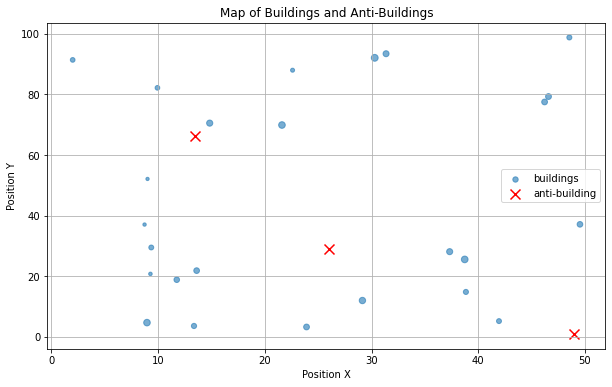

In [67]:
# Creating a plot representing the positions of buildings and anti-buildings

plt.figure(figsize=(10, 6))

# Buildings
plt.scatter(*zip(*building_positions), s=[p / 10 for p in populations], label='buildings', alpha=0.6)

# Anti-buildings
plt.scatter(*zip(*anti_building_positions), s=100, marker='x', color='red', label='anti-building')

plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.title('Map of Buildings and Anti-Buildings')
plt.legend()
plt.grid(True)
plt.show()



<a id="2"></a>
<h3 style="color: #4a86e8; font-size: 28px; font-family: 'Georgia', serif; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin-top: 20px; border-left: 5px solid #4a86e8; padding-left: 10px;">c. cost function</h3>

In [68]:
# Useful Functions:
import math

def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def modified_cost_function(antenna_position, building_positions=building_positions, populations=populations, anti_building_positions=anti_building_positions):
    a, b = antenna_position
    total_cost = 0
    
    for (x, y), k in zip(building_positions, populations):
        distance = euclidean_distance(x, y, a, b)
        total_cost += k * distance
        
    total_cost /= sum(populations)
    # Subtraction of cost for each anti-building
    for (x, y) in anti_building_positions:
        distance = euclidean_distance(x, y, a, b)
        # print(1/((distance+0.01)))
        total_cost += pow(100000 * 1 / (distance + 0.01), 1/3)  # 50 is a signal attenuation constant, avoiding the issue of 0
    return total_cost




<IPython.core.display.Javascript object>


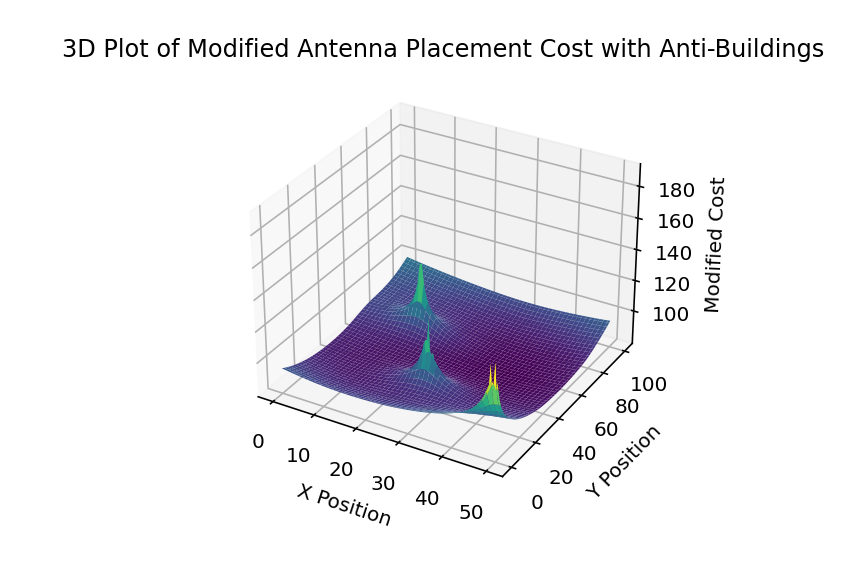

In [69]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Grid of points for x and y
x = np.linspace(0, 50, 100)
y = np.linspace(0, 100, 100)
x, y = np.meshgrid(x, y)

# Calculate costs with anti-buildings
costs_with_anti_buildings = np.array([[modified_cost_function((xi, yi), building_positions, populations, anti_building_positions) 
                                       for xi, yi in zip(x_row, y_row)] 
                                      for x_row, y_row in zip(x, y)])

# Create an interactive 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, costs_with_anti_buildings, cmap='viridis')

# Labels and title
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Modified Cost')
ax.set_title('3D Plot of Modified Antenna Placement Cost with Anti-Buildings')

plt.show()


<a id="1"></a>
    
<div class='alert-block alert-info' style="font-size: 24px; font-family: 'Georgia', serif; padding: 2px; border-radius: 10px; margin: 20px; text-align:center; padding-bottom: 20px;">
    <br>
    <h1 align="center"; >3. Resolution of the optimisation problem</h1>
    <br>
</div>

<a id="2"></a><h3 style="color: #4a86e8; font-size: 28px; font-family: 'Georgia', serif; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin-top: 20px; border-left: 5px solid #4a86e8; padding-left: 10px;">Finding the minimum of our objective function using Newton method </h3>

In [70]:
FValues = []
def newton_optimization(f, initial_guess, h=1e-5, tol=1e-6, max_iterations=100):
    x = initial_guess
    for iteration in range(max_iterations):
        gradient_x = compute_gradient(f, x, h)
        hessian_x = compute_hessian(f, x, h)
        FValues.append(f(x[0], x[1]))
        
        if np.linalg.norm(gradient_x) < tol:
            break
        
        try:
            # Computing the descent direction
            direction = np.linalg.solve(hessian_x, -gradient_x)
        except np.linalg.LinAlgError:
            # In case of failed matrix inversion, stop the search
            break
        
        # Update parameters
        x = x + direction
        
    return x, f(x[0], x[1])

# Function to compute the numerical gradient
def compute_gradient(f, x, h):
    gradient_x = np.zeros_like(x)
    for i in range(len(x)):
        x_plus_h = x.copy()
        x_minus_h = x.copy()
        x_plus_h[i] += h
        x_minus_h[i] -= h
        gradient_x[i] = (f(*x_plus_h) - f(*x_minus_h)) / (2 * h)
    return gradient_x

# Function to compute the numerical hessian
def compute_hessian(f, x, h):
    n = len(x)
    hessian_x = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            x_plus_h = x.copy()
            x_minus_h = x.copy()
            x_plus_h[i] += h
            x_plus_h[j] += h
            x_minus_h[i] -= h
            x_minus_h[j] -= h
            hessian_x[i, j] = (f(*x_plus_h) - 2 * f(*x) + f(*x_minus_h)) / (h ** 2)
            hessian_x[j, i] = hessian_x[i, j]  # The hessian is symmetric
    return hessian_x


def f(x, y):
    return modified_cost_function((x, y))

initial_guess = np.array([50.0, 50.0])
minimum, min_value = newton_optimization(f, initial_guess)
print("Minimum found at x =", minimum[0], "y =", minimum[1])
print("Minimum value of the function f(x, y) =", min_value)


Minimum found at x = 36.30367530726531 y = 55.218214148133974
Minimum value of the function f(x, y) = 80.74591019461519


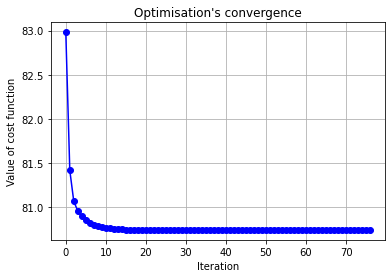

In [71]:
%matplotlib inline
plt.plot(range(len(FValues)), FValues, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Value of cost function')
plt.title("Optimisation's convergence")
plt.grid(True)
plt.show()


<a id="2"></a><h3 style="color: #4a86e8; font-size: 28px; font-family: 'Georgia', serif; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin-top: 20px; border-left: 5px solid #4a86e8; padding-left: 10px;">Finding the minimum of our objective function using the Davidon Fletcher Powell optimization method</h3>

In [72]:
import numpy as np

FValues = []

def davidon_fletcher_powell_optimization(f, initial_guess, h=1e-5, tol=1e-6, max_iterations=100):
    x = initial_guess
    n = len(x)
    H = np.eye(n)  # Initial approximation of the Hessian as the identity matrix
    gradient = compute_gradient(f, x, h)
    FValues.append(f(x[0], x[1]))
    
    for iteration in range(max_iterations):
        if np.linalg.norm(gradient) < tol:
            break
        
        direction = -np.dot(H, gradient)  # Descent direction
        
        # Find the optimal step size in the descent direction
        alpha = line_search(f, x, direction)
        
        x_old = x
        x = x + alpha * direction
        
        gradient_old = gradient
        gradient = compute_gradient(f, x, h)
        
        s = x - x_old
        y = gradient - gradient_old
        
        # Update the approximation of the Hessian (Davidon-Fletcher-Powell formula)
        rho = 1 / np.dot(y, s)
        A = np.outer(s, s)
        B = np.outer(np.dot(H, y), y)
        H = H + rho * (A - B)
        
        FValues.append(f(x[0], x[1]))
    
    return x, f(x[0], x[1])

# Function to compute the numerical gradient
def compute_gradient(f, x, h):
    gradient_x = np.zeros_like(x)
    for i in range(len(x)):
        x_plus_h = x.copy()
        x_minus_h = x.copy()
        x_plus_h[i] += h
        x_minus_h[i] -= h
        gradient_x[i] = (f(*x_plus_h) - f(*x_minus_h)) / (2 * h)
    return gradient_x

# Line search function to find the optimal step size
def line_search(f, x, direction):
    # Return the optimal step size alpha in the given direction
    # For example, one can use the backtracking method for a simple linear search
    alpha = 1.0
    beta = 0.5
    while f(*(x + alpha * direction)) > f(*x) + 1e-4 * alpha * np.dot(compute_gradient(f, x, 1e-5), direction):
        alpha *= beta
    return alpha

# Example usage:
def f(x, y):
    return modified_cost_function((x, y))

initial_guess = np.array([50.0, 50.0])
minimum, min_value = davidon_fletcher_powell_optimization(f, initial_guess)
print("Minimum found at x =", minimum[0], "y =", minimum[1])
print("Minimum value of the function f(x, y) =", min_value)


Minimum found at x = 36.271440298710424 y = 55.13881951130935
Minimum value of the function f(x, y) = 80.7459504413909


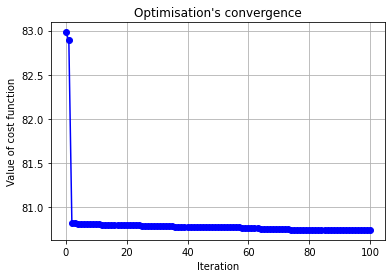

In [73]:
%matplotlib inline
plt.plot(range(len(FValues)), FValues, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Value of cost function')
plt.title("Optimisation's convergence")
plt.grid(True)
plt.show()


<a id="2"></a><h3 style="color: #4a86e8; font-size: 28px; font-family: 'Georgia', serif; text-shadow: 2px 2px 4px rgba(0,0,0,0.3); margin-top: 20px; border-left: 5px solid #4a86e8; padding-left: 10px;">Computing and comparing the convergence speed and computation time between the 2 methods</h3>

In [74]:
#Rewriting of the newton method to stop when encountering the minimum with a tolerance of 1E-6
FValues_N = []
def newton_optimization2(f, initial_guess, h=1e-5, tol=1e-6, max_iterations=100):
    x = initial_guess
    prev_value = None
    iterations = 0
    
    for iteration in range(max_iterations):
        gradient_x = compute_gradient(f, x, h)
        hessian_x = compute_hessian(f, x, h)
        FValues_N.append(f(x[0], x[1]))
        
        if np.linalg.norm(gradient_x) < tol:
            break
        
        try:
            # Computing the descent direction
            direction = np.linalg.solve(hessian_x, -gradient_x)
        except np.linalg.LinAlgError:
            # In case of failed matrix inversion, stop the search
            break
        
        # Update parameters
        x = x + direction
        
        value = f(x[0], x[1])
        
        # Check if the value is repeating
        if prev_value is not None and abs(value - prev_value) < 1e-6:
            break
        
        prev_value = value
        iterations += 1
        
    return x, f(x[0], x[1]), iterations

In [75]:
#Rewriting of the DFP method to stop when encountering the minimum with a tolerance of 1E-6

FValues_DFP = []

def davidon_fletcher_powell_optimization2(f, initial_guess, h=1e-5, tol=1e-6, max_iterations=100):
    x = initial_guess
    n = len(x)
    H = np.eye(n)  # Initial approximation of the Hessian as the identity matrix
    gradient = compute_gradient(f, x, h)
    prev_value = None
    iterations = 0
    
    for iteration in range(max_iterations):
        if np.linalg.norm(gradient) < tol:
            break
        
        direction = -np.dot(H, gradient)  # Descent direction
        
        # Find the optimal step size in the descent direction
        alpha = line_search(f, x, direction)
        
        x_old = x
        x = x + alpha * direction
        
        gradient_old = gradient
        gradient = compute_gradient(f, x, h)
        
        value = f(x[0], x[1])
        FValues_DFP.append(value)
        
        # Check if the value is repeating with the defined tolerance
        if prev_value is not None and abs(value - prev_value) < 1e-6:
            break
        
        prev_value = value
        iterations += 1
        
        s = x - x_old
        y = gradient - gradient_old
        
        # Update the approximation of the Hessian (Davidon-Fletcher-Powell formula)
        rho = 1 / np.dot(y, s)
        A = np.outer(s, s)
        B = np.outer(np.dot(H, y), y)
        H = H + rho * (A - B)
    
    return x, f(x[0], x[1]), iterations



In [76]:
import time

def compare_optimization_methods(newton_opt, dfp_opt, f, initial_guess, h=1e-5, tol=1e-6, max_iterations=100):
    start_time_newton = time.time()
    result_newton, _, iterations_newton = newton_opt(f, initial_guess, h, tol, max_iterations)
    end_time_newton = time.time()
    time_taken_newton = end_time_newton - start_time_newton
    
    start_time_dfp = time.time()
    result_dfp, _, iterations_dfp = dfp_opt(f, initial_guess, h, tol, max_iterations)
    end_time_dfp = time.time()
    time_taken_dfp = end_time_dfp - start_time_dfp
    
    print("Newton Optimization:")
    print("Result:", result_newton)
    print("Time Taken:", time_taken_newton, "seconds")
    print("Iterations:", iterations_newton)
    print("\nDavidon-Fletcher-Powell (DFP) Optimization:")
    print("Result:", result_dfp)
    print("Time Taken:", time_taken_dfp, "seconds")
    print("Iterations:", iterations_dfp)

# Example usage:
compare_optimization_methods(newton_optimization2, davidon_fletcher_powell_optimization2, f, initial_guess)


Newton Optimization:
Result: [36.31511861 55.2349728 ]
Time Taken: 0.06209897994995117 seconds
Iterations: 38

Davidon-Fletcher-Powell (DFP) Optimization:
Result: [36.2714403  55.13881951]
Time Taken: 0.13862085342407227 seconds
Iterations: 100


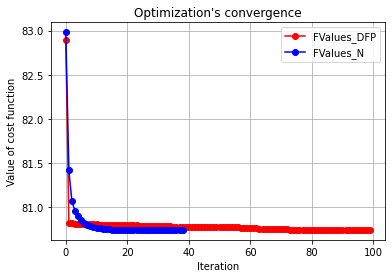

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming FValues_DFP and FValues_N are defined and contain the respective values

# Plot FValues_DFP
plt.plot(range(len(FValues_DFP)), FValues_DFP, marker='o', linestyle='-', color='r', label='FValues_DFP')

# Plot FValues_N
plt.plot(range(len(FValues_N)), FValues_N, marker='o', linestyle='-', color='b', label='FValues_N')

# Labels, title, and legend
plt.xlabel('Iteration')
plt.ylabel('Value of cost function')
plt.title("Optimization's convergence")
plt.grid(True)
plt.legend()

# Show the combined plot
plt.show()

<div style="background-color: #e8f4f8; border: 2px solid #b6d4e0; padding: 20px; border-radius: 10px; margin: 20px; box-shadow: 0 4px 6px rgba(0,0,0,0.1);">
    <h3 style="color: #2c7be5; font-size: 22px; font-family: 'Verdana', sans-serif; margin-bottom: 15px;">Conclusion</h3>
    <p style="line-height: 1.6; color: #333; font-family: 'Arial', sans-serif;">

### Please note that theses results are for a given random initiation and might change but the observations should be the same

The Newton Optimization and Davidon-Fletcher-Powell (DFP) Optimization methods were employed to optimize a given function. Their respective results, time taken, and number of iterations are summarized below:

#### Newton Optimization:
- **Result:** [36.31511861 55.2349728 ]
- **Time Taken:** 0.06209897994995117 seconds
- **Iterations:** 38

#### Davidon-Fletcher-Powell (DFP) Optimization:
- **Result:** [36.2714403  55.13881951]
- **Time Taken:** 0.13862085342407227 seconds
- **Iterations:** 100

Both optimization methods yielded relatively close results in terms of the optimal coordinates they found, with Newton Optimization converging slightly faster in terms of time taken and iterations.


#### Strengths and Weaknesses:

**Newton Optimization:**
- **Strengths:**
  - Faster convergence with fewer iterations.
  - Very accurate : the principle is simple but really good
- **Weaknesses:**
  - Susceptible to getting stuck in local minima or diverging if started at certain initial coordinates. For instance, starting Newton Optimization at coordinates (1000, 1000) may not converge to the same optimum, indicating sensitivity to initial conditions.
  - After observation if the starting point is on/near an anti-buiding the algorithm converge really slowly or do not converge.

**Davidon-Fletcher-Powell (DFP) Optimization:**
- **Strengths:**
  - More robust in avoiding convergence issues at different starting points.
  - On our problem we observe quite often that it is faster than Newton.
- **Weaknesses:**
  - Relatively slower convergence compared to Newton's method due to more iterations required.
  - for larger problem it can require a lot of memory
  - Less stable and accurate than newton

In summary, while Newton's method demonstrated faster convergence and fewer iterations, its sensitivity to initial conditions might cause it to converge to different optima. On the other hand, DFP is more robust across various starting points but tends to require more iterations for convergence. The choice between these methods depends on the specific problem, considering their trade-offs between convergence speed and robustness to initial conditions.
s of buildings and anti-buildings.
